# Proyecto: Resultados ICFES 2019 Colombia

Dataset with the ICFES result for 2019 (second semester) and 2020 year. Also, We'll use some extra information about internet connection for each colombian depto. 

**Objetives:**
1. Explore the dataset
2. Find insights
3. User additional information for other sources with API connection
4. Create a basic ML models
5. Connect to a SQL external engine
6. Create a dashboard

## 0. Preliminar

### 0.1. Context

The pandemic in 2020 and the changes to the ICFES exam; it is important to evaluate how the teaching method evolved in the schools in the last year and how this affected the students in the presentation of the exam. Will there be any differentiating factor between the scores?


### 0.2. Problem

Change in the teaching methodology of high school seniors. 

### 0.3. Inquiry

Now, there are son steps:

**1.** Well, we nedd the test results  
**2.** What kind of information I need? For each student or for each city?  
**3.** How many features I need if I want to explore the information or predict future test results?  
**4.** How I will show the information?

### 0.4. Data

We explroe this datasets:

**1. ICFES test results:** For second semestres 2020 and year 2021 Link: https://www.datos.gov.co/Educaci-n/PUNTAJE-ICFES-POR-DEPARTAMENTOS/x9vi-iv8c.  
**2. DANE geographic distribution:** A unique identifier for each city in Colombia.  
**3. Internet connection availability:** In each city in Colombia.  

All of this info you can find in Datos.gov (offial Colombia goverment site for public information)

### Let's try a solution

We'll explore:
1. Libraries for this notebook.
2. Exploration and data clean.
3. Insights.
4. Predict.
5. Export the info.
6. A BI solution.

## 1. Libraries

### 1.1 Init

For more information, also you would read REAME.txt or explore /utils folder.

In [2]:
import sys
sys.path.append('/utils/__init__.py')
import utils

In [3]:
utils.letsgo()

Utils load correctly


### 1.1 For this notebook

a old familiar feeling

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

# Save a palette to a variable:
palette = sns.color_palette("bright")
sns.set_palette(palette)

import matplotlib.pyplot as plt 
from matplotlib.ticker import ScalarFormatter

%matplotlib inline 
sns.set(color_codes=True)

# Machine learning
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

## 2. Load the datasets

We've three dataset for 2019 and 202 years.|

In [5]:
df_2019_2 = pd.read_csv("datasets\Saber_11__2019-2.csv")
df_2020_1 = pd.read_csv("datasets\Saber_11__2020-1.csv")
df_2020_2 = pd.read_csv("datasets\Saber_11__2020-2.csv")

C:\Users\ljpca\AppData\Local\Temp\ipykernel_24684\893989392.py:1: DtypeWarning: Columns (76,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2019_2 = pd.read_csv("datasets\Saber_11__2019-2.csv")


### 2.1 Exploration

Lokk all the columns for each dataframe.

In [6]:
df_2019_2.columns

Index(['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO',
       'ESTU_FECHANACIMIENTO', 'PERIODO', 'ESTU_CONSECUTIVO',
       'ESTU_ESTUDIANTE', 'ESTU_TIENEETNIA', 'ESTU_PAIS_RESIDE', 'ESTU_ETNIA',
       'ESTU_DEPTO_RESIDE', 'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE',
       'ESTU_COD_RESIDE_MCPIO', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR',
       'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE',
       'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS',
       'FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS',
       'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE',
       'FAMI_SITUACIONECONOMICA', 'ESTU_DEDICACIONLECTURADIARIA',
       'ESTU_DEDICACIONINTERNET', 'ESTU_HORASSEMANATRABAJA',
       'ESTU_TIPOREMUNERACION', 'COLE_C

In [7]:
df_2020_1.columns

Index(['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO',
       'ESTU_FECHANACIMIENTO', 'PERIODO', 'ESTU_CONSECUTIVO',
       'ESTU_ESTUDIANTE', 'ESTU_PAIS_RESIDE', 'ESTU_TIENEETNIA',
       'ESTU_DEPTO_RESIDE', 'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE',
       'ESTU_COD_RESIDE_MCPIO', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR',
       'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE',
       'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS',
       'FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS',
       'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE',
       'FAMI_SITUACIONECONOMICA', 'ESTU_DEDICACIONLECTURADIARIA',
       'ESTU_DEDICACIONINTERNET', 'ESTU_HORASSEMANATRABAJA',
       'ESTU_TIPOREMUNERACION', 'COLE_CODIGO_ICFES',


In [8]:
df_2020_2.columns

Index(['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO',
       'ESTU_FECHANACIMIENTO', 'PERIODO', 'ESTU_CONSECUTIVO',
       'ESTU_ESTUDIANTE', 'ESTU_PAIS_RESIDE', 'ESTU_TIENEETNIA',
       'ESTU_DEPTO_RESIDE', 'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE',
       'ESTU_COD_RESIDE_MCPIO', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR',
       'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE',
       'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS',
       'FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS',
       'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE',
       'FAMI_SITUACIONECONOMICA', 'ESTU_DEDICACIONLECTURADIARIA',
       'ESTU_DEDICACIONINTERNET', 'ESTU_HORASSEMANATRABAJA',
       'ESTU_TIPOREMUNERACION', 'COLE_CODIGO_ICFES',


Well, we've the same columns for each dataframe. We could create a identifier column for each dataframe.

In [9]:
df_2019_2["ANIO_PR"] = 201902
df_2020_1["ANIO_PR"] = 202001
df_2020_2["ANIO_PR"] = 202002

And concat it.

In [10]:
df = pd.concat([df_2019_2, df_2020_1, df_2020_2])
df_copy = df.copy()

Check it:

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1066519 entries, 0 to 504871
Data columns (total 83 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   ESTU_TIPODOCUMENTO             1066519 non-null  object 
 1   ESTU_NACIONALIDAD              1066519 non-null  object 
 2   ESTU_GENERO                    1066510 non-null  object 
 3   ESTU_FECHANACIMIENTO           1066519 non-null  object 
 4   PERIODO                        1066519 non-null  int64  
 5   ESTU_CONSECUTIVO               1066519 non-null  object 
 6   ESTU_ESTUDIANTE                1066519 non-null  object 
 7   ESTU_TIENEETNIA                1062762 non-null  object 
 8   ESTU_PAIS_RESIDE               1066519 non-null  object 
 9   ESTU_ETNIA                     546212 non-null   object 
 10  ESTU_DEPTO_RESIDE              1065376 non-null  object 
 11  ESTU_COD_RESIDE_DEPTO          1065753 non-null  object 
 12  ESTU_MCPIO_RESI

We've a lot of object columns in the dataframe. Let's try a some basic stadistics.

In [12]:
df.describe()

,PERIODO,COLE_CODIGO_ICFES,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_COD_MCPIO_UBICACION,COLE_COD_DEPTO_UBICACION,ESTU_COD_MCPIO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,...,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,PUNT_GLOBAL,ESTU_NSE_ESTABLECIMIENTO,ANIO_PR
count,1.066519e+06,1.066519e+06,1.066519e+06,1.066519e+06,1.066519e+06,1.066519e+06,1.066311e+06,1.066311e+06,1.066519e+06,1.066519e+06,...,1.066519e+06,1.066519e+06,1.066519e+06,1.066519e+06,1.066519e+06,1.066130e+06,1.066519e+06,1.066519e+06,1.050991e+06,1.066519e+06
mean,2.019884e+04,2.407790e+05,2.047913e+11,2.052798e+11,3.283133e+04,3.259407e+01,3.281856e+04,3.259975e+01,5.226047e+01,5.015271e+01,...,5.021358e+01,2.024289e+00,4.730601e+01,5.020896e+01,1.966573e+00,4.793001e+01,5.011527e+01,2.478352e+02,2.401810e+00,2.019508e+05
std,4.966782e+00,2.635567e+05,9.281453e+10,9.347122e+10,2.645210e+04,2.642888e+01,2.652062e+04,2.649551e+01,1.041149e+01,2.893460e+01,...,2.890131e+01,7.613602e-01,1.216499e+01,2.890098e+01,8.292219e-01,1.228006e+01,2.892617e+01,5.053635e+01,6.749349e-01,4.997058e+01
min,2.019400e+04,7.500000e+01,1.050010e+11,1.050010e+11,5.001000e+03,5.000000e+00,5.001000e+03,5.000000e+00,0.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,2.019020e+05
25%,2.019400e+04,5.168000e+04,1.170880e+11,1.171740e+11,1.100100e+04,1.100000e+01,1.100100e+04,1.100000e+01,4.500000e+01,2.500000e+01,...,2.500000e+01,1.000000e+00,3.800000e+01,2.500000e+01,1.000000e+00,3.900000e+01,2.500000e+01,2.100000e+02,2.000000e+00,2.019020e+05
50%,2.019400e+04,1.241640e+05,1.734110e+11,1.735630e+11,2.075000e+04,2.000000e+01,2.040000e+04,2.000000e+01,5.200000e+01,5.000000e+01,...,5.000000e+01,2.000000e+00,4.600000e+01,5.000000e+01,2.000000e+00,4.600000e+01,5.000000e+01,2.450000e+02,2.000000e+00,2.019020e+05
75%,2.020400e+04,2.868640e+05,3.050880e+11,3.050880e+11,5.400100e+04,5.400000e+01,5.400100e+04,5.400000e+01,6.000000e+01,7.500000e+01,...,7.500000e+01,3.000000e+00,5.600000e+01,7.500000e+01,3.000000e+00,5.500000e+01,7.500000e+01,2.830000e+02,3.000000e+00,2.020020e+05
max,2.020400e+04,7.524440e+05,8.548740e+11,8.548740e+11,9.977300e+04,9.900000e+01,9.977300e+04,9.900000e+01,1.000000e+02,1.000000e+02,...,1.000000e+02,4.000000e+00,1.000000e+02,1.000000e+02,4.000000e+00,1.000000e+02,1.000000e+02,5.000000e+02,4.000000e+00,2.020020e+05


Well, we used this other data sourcer:
1. https://www.datos.gov.co/en/Mapas-Nacionales/Departamentos-y-municipios-de-Colombia/xdk5-pm3f: We'll get DANE depto code.
2. https://www.datos.gov.co/en/Ciencia-Tecnolog-a-e-Innovaci-n/Cobertura-m-vil-por-tecnolog-a-departamento-y-muni/9mey-c8s8: Internet available for each depto.

For code datils pls check python init code:

In [13]:
danecode = utils.getcodedane()

In [14]:
internet_info = utils.datainternet()

In [15]:
df["ESTU_MCPIO_RESIDE"].unique()

array(['SANTA ANA', 'BOGOTÁ D.C.', 'CARTAGENA DE INDIAS', ...,
       'BELÉN DE BAJIRÁ', 'YAVARATÉ', 'HERRÁN'], dtype=object)

Let's go for DANE code dataframe

In [16]:
danecode.tail()

,region,c_digo_dane_del_departamento,departamento,c_digo_dane_del_municipio,municipio
1118,Región Eje Cafetero - Antioquia,17,Caldas,17.444,Marquetalia
1119,Región Pacífico,52,Nariño,52.051,Arboleda
1120,Región Pacífico,76,Valle del Cauca,76.109,Buenaventura
1121,Región Caribe,47,Magdalena,47.189,Ciénaga
1122,Región Caribe,8,Atlántico,8.56,Ponedera


Ready! We're gointo with internet dataframe:

In [17]:
internet_info.head()

,a_o,trimestre,proveedor,cod_departamento,departamento,cod_municipio,municipio,cabecera_municipal,cod_centro_poblado,centro_poblado,cobertura_2g,cobertura_3g,cobertura_hspa_hspa_dc,cobertuta_lte
0,2019,4,COLOMBIA TELECOMUNICACIONES S.A. E.S.P.,05,ANTIOQUIA,05001,MEDELLIN,NO,5001004,SANTA ELENA,S,S,N,S
1,2019,4,COLOMBIA TELECOMUNICACIONES S.A. E.S.P.,05,ANTIOQUIA,05001,MEDELLIN,NO,5001001,PALMITAS,S,S,N,N
2,2019,4,COMUNICACION CELULAR S A COMCEL S A,05,ANTIOQUIA,05001,MEDELLIN,NO,5001004,SANTA ELENA,S,S,S,S
3,2019,4,EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP,05,ANTIOQUIA,05001,MEDELLIN,SI,NaN,NaN,N,N,N,S
4,2019,4,COMUNICACION CELULAR S A COMCEL S A,05,ANTIOQUIA,05001,MEDELLIN,SI,NaN,NaN,S,S,S,S


Municipio code is a string data column.

In [18]:
danecode["c_digo_dane_del_municipio"] = danecode["c_digo_dane_del_municipio"].replace({'.':''})

In [19]:
danecode["c_digo_dane_del_municipio"] = danecode["c_digo_dane_del_municipio"].apply(lambda x: x.replace(".",""))

In [20]:
danecode["c_digo_dane_del_municipio"].unique()

array(['5001', '5002', '5004', ..., '76109', '47189', '856'], dtype=object)

In [21]:
internet_info["c_digo_dane_del_municipio"] = internet_info["cod_municipio"].astype("int")

danecode["c_digo_dane_del_municipio"] = danecode["c_digo_dane_del_municipio"].astype("int")

Check:

In [22]:
internet_info["c_digo_dane_del_municipio"]

0    5001
1    5001
2    5001
3    5001
4    5001
5    5001
6    5001
7    5001
8    5001
9    5001
Name: c_digo_dane_del_municipio, dtype: int32

Join these dataframe:

In [23]:
inner_api_df = pd.merge(internet_info, danecode, how="inner", on=["c_digo_dane_del_municipio"])

In [24]:
inner_api_df.head()

,a_o,trimestre,proveedor,cod_departamento,departamento_x,cod_municipio,municipio_x,cabecera_municipal,cod_centro_poblado,centro_poblado,cobertura_2g,cobertura_3g,cobertura_hspa_hspa_dc,cobertuta_lte,c_digo_dane_del_municipio,region,c_digo_dane_del_departamento,departamento_y,municipio_y
0,2019,4,COLOMBIA TELECOMUNICACIONES S.A. E.S.P.,05,ANTIOQUIA,05001,MEDELLIN,NO,5001004,SANTA ELENA,S,S,N,S,5001,Región Eje Cafetero - Antioquia,5,Antioquia,Medellín
1,2019,4,COLOMBIA TELECOMUNICACIONES S.A. E.S.P.,05,ANTIOQUIA,05001,MEDELLIN,NO,5001001,PALMITAS,S,S,N,N,5001,Región Eje Cafetero - Antioquia,5,Antioquia,Medellín
2,2019,4,COMUNICACION CELULAR S A COMCEL S A,05,ANTIOQUIA,05001,MEDELLIN,NO,5001004,SANTA ELENA,S,S,S,S,5001,Región Eje Cafetero - Antioquia,5,Antioquia,Medellín
3,2019,4,EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP,05,ANTIOQUIA,05001,MEDELLIN,SI,NaN,NaN,N,N,N,S,5001,Región Eje Cafetero - Antioquia,5,Antioquia,Medellín
4,2019,4,COMUNICACION CELULAR S A COMCEL S A,05,ANTIOQUIA,05001,MEDELLIN,SI,NaN,NaN,S,S,S,S,5001,Región Eje Cafetero - Antioquia,5,Antioquia,Medellín


We don't need all the columns.

In [25]:
inner_api_df.columns

Index(['a_o', 'trimestre', 'proveedor', 'cod_departamento', 'departamento_x',
       'cod_municipio', 'municipio_x', 'cabecera_municipal',
       'cod_centro_poblado', 'centro_poblado', 'cobertura_2g', 'cobertura_3g',
       'cobertura_hspa_hspa_dc', 'cobertuta_lte', 'c_digo_dane_del_municipio',
       'region', 'c_digo_dane_del_departamento', 'departamento_y',
       'municipio_y'],
      dtype='object')

In [26]:
api_df = inner_api_df[['municipio_x', 'cobertura_2g', 'cobertura_3g',
       'cobertura_hspa_hspa_dc', 'cobertuta_lte']].drop_duplicates()

In [27]:
api_df.head()

,municipio_x,cobertura_2g,cobertura_3g,cobertura_hspa_hspa_dc,cobertuta_lte
0,MEDELLIN,S,S,N,S
1,MEDELLIN,S,S,N,N
2,MEDELLIN,S,S,S,S
3,MEDELLIN,N,N,N,S
5,MEDELLIN,S,N,N,S


Great; I didn't see we have accent in the dataset :(

In [28]:
# PRO TIP: This treak could be usefull in the future
api_df['municipio_x'] = api_df['municipio_x'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

In [29]:
api_df['municipio_x']

0    MEDELLIN
1    MEDELLIN
2    MEDELLIN
3    MEDELLIN
5    MEDELLIN
6    MEDELLIN
Name: municipio_x, dtype: object

IT WORKS!!! I guess

Join datasets:

In [30]:
api_df.rename(columns = {'municipio_x':'ESTU_MCPIO_RESIDE'}, inplace = True)

In [31]:
api_df.columns

Index(['ESTU_MCPIO_RESIDE', 'cobertura_2g', 'cobertura_3g',
       'cobertura_hspa_hspa_dc', 'cobertuta_lte'],
      dtype='object')

In [32]:
df = pd.merge(df, api_df, how="left", on=["ESTU_MCPIO_RESIDE"])

In [33]:
df.head()

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_TIENEETNIA,ESTU_PAIS_RESIDE,ESTU_ETNIA,...,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E,ANIO_PR,cobertura_2g,cobertura_3g,cobertura_hspa_hspa_dc,cobertuta_lte
0,TI,COLOMBIA,M,02/18/2002 12:00:00 AM,20194,SB11201940031558,ESTUDIANTE,No,COLOMBIA,-,...,50.9421557404314,2.0,2.0,PUBLICAR,NO,201902,NaN,NaN,NaN,NaN
1,TI,COLOMBIA,M,06/28/2003 12:00:00 AM,20194,SB11201940303339,ESTUDIANTE,No,COLOMBIA,-,...,59.767864431576,3.0,4.0,PUBLICAR,NO,201902,NaN,NaN,NaN,NaN
2,TI,COLOMBIA,M,06/02/2001 12:00:00 AM,20194,SB11201940255017,ESTUDIANTE,No,COLOMBIA,-,...,50.7642383644749,2.0,3.0,PUBLICAR,GENERACION E - GRATUIDAD,201902,NaN,NaN,NaN,NaN
3,TI,COLOMBIA,M,04/26/2002 12:00:00 AM,20194,SB11201940154799,ESTUDIANTE,Si,COLOMBIA,Ninguno,...,45.7791353123516,2.0,3.0,PUBLICAR,GENERACION E - GRATUIDAD,201902,NaN,NaN,NaN,NaN
4,TI,COLOMBIA,M,02/05/2002 12:00:00 AM,20194,SB11201940280831,ESTUDIANTE,No,COLOMBIA,-,...,52.9109464277177,3.0,3.0,PUBLICAR,NO,201902,NaN,NaN,NaN,NaN


### 2.2 Cleaning

Well, for object columns, we use frequency encode for all. It's just an academic project so, we won't discuss about its the best encoding.

Select the columns to encode:

In [34]:
to_encode = ['ESTU_NACIONALIDAD', 'ESTU_GENERO', 'ESTU_FECHANACIMIENTO', 'PERIODO',
       'ESTU_CONSECUTIVO', 'ESTU_ESTUDIANTE', 'ESTU_TIENEETNIA','ESTU_PAIS_RESIDE', "DESEMP_INGLES",
       'ESTU_ETNIA', 'ESTU_DEPTO_RESIDE', 'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE', 
       'ESTU_COD_RESIDE_MCPIO','FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR', 'FAMI_CUARTOSHOGAR',
       'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE', 'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV',
       'FAMI_TIENECOMPUTADOR', 'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS', 'FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS',
       'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE', 'ESTU_TIPODOCUMENTO',
       'FAMI_SITUACIONECONOMICA', 'ESTU_DEDICACIONLECTURADIARIA', 'ESTU_DEDICACIONINTERNET', 'ESTU_HORASSEMANATRABAJA',
       'ESTU_TIPOREMUNERACION', 'COLE_CODIGO_ICFES', 'COLE_COD_DANE_ESTABLECIMIENTO', 'COLE_NOMBRE_ESTABLECIMIENTO',
       'COLE_GENERO', 'COLE_NATURALEZA', 'COLE_CALENDARIO', 'COLE_BILINGUE', 'COLE_CARACTER', 'COLE_COD_DANE_SEDE', 'COLE_NOMBRE_SEDE',
       'COLE_SEDE_PRINCIPAL', 'COLE_AREA_UBICACION', 'COLE_JORNADA', 'COLE_COD_MCPIO_UBICACION', 'COLE_MCPIO_UBICACION',
       'COLE_COD_DEPTO_UBICACION', 'COLE_DEPTO_UBICACION', 'ESTU_PRIVADO_LIBERTAD', 'ESTU_COD_MCPIO_PRESENTACION',
       'ESTU_MCPIO_PRESENTACION', 'ESTU_DEPTO_PRESENTACION', 'ESTU_COD_DEPTO_PRESENTACION',
       'ESTU_INSE_INDIVIDUAL', 'ESTU_NSE_INDIVIDUAL', 'ESTU_NSE_ESTABLECIMIENTO', 'ESTU_ESTADOINVESTIGACION', 'ESTU_GENERACION-E']

And use "fredencode.py" in utils:

In [35]:
lista_enc, df = utils.freqEcondeList(df, to_encode)

"Lista_enc" is similar to a "dictionary". There is a value encoding for each column.

In [36]:
lista_enc.ESTU_ESTADOINVESTIGACION

ESTU_ESTADOINVESTIGACION
NO SE COMPROBO IDENTIDAD DEL EXAMINADO    0.000255
PUBLICAR                                  0.999328
VALIDEZ OFICINA JURÍDICA                  0.000417
dtype: float64

Look it:

In [37]:
df.head()

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_TIENEETNIA,ESTU_PAIS_RESIDE,ESTU_ETNIA,...,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E,ANIO_PR,cobertura_2g,cobertura_3g,cobertura_hspa_hspa_dc,cobertuta_lte
0,0.817426,0.995713,0.455908,0.000579,0.512145,9.376298e-07,1.0,0.928750,0.995713,0.474631,...,9.376298e-07,0.343645,0.515979,0.999328,0.480248,201902,NaN,NaN,NaN,NaN
1,0.817426,0.995713,0.455908,0.000802,0.512145,9.376298e-07,1.0,0.928750,0.995713,0.474631,...,9.376298e-07,0.352831,0.046181,0.999328,0.480248,201902,NaN,NaN,NaN,NaN
2,0.817426,0.995713,0.455908,0.000368,0.512145,9.376298e-07,1.0,0.928750,0.995713,0.474631,...,9.376298e-07,0.343645,0.363439,0.999328,0.509646,201902,NaN,NaN,NaN,NaN
3,0.817426,0.995713,0.455908,0.000667,0.512145,9.376298e-07,1.0,0.067373,0.995713,0.004165,...,9.376298e-07,0.343645,0.363439,0.999328,0.509646,201902,NaN,NaN,NaN,NaN
4,0.817426,0.995713,0.455908,0.000591,0.512145,9.376298e-07,1.0,0.928750,0.995713,0.474631,...,9.376298e-07,0.352831,0.363439,0.999328,0.480248,201902,NaN,NaN,NaN,NaN


Some objects column survive:

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1066519 entries, 0 to 1066518
Data columns (total 87 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   ESTU_TIPODOCUMENTO             1066519 non-null  float64
 1   ESTU_NACIONALIDAD              1066519 non-null  float64
 2   ESTU_GENERO                    1066510 non-null  float64
 3   ESTU_FECHANACIMIENTO           1066519 non-null  float64
 4   PERIODO                        1066519 non-null  float64
 5   ESTU_CONSECUTIVO               1066519 non-null  float64
 6   ESTU_ESTUDIANTE                1066519 non-null  float64
 7   ESTU_TIENEETNIA                1062762 non-null  float64
 8   ESTU_PAIS_RESIDE               1066519 non-null  float64
 9   ESTU_ETNIA                     546212 non-null   float64
 10  ESTU_DEPTO_RESIDE              1065376 non-null  float64
 11  ESTU_COD_RESIDE_DEPTO          1065753 non-null  float64
 12  ESTU_MCPIO_RES

Two columns are::
    
1. DESEMP_INGLES                  1066519 non-null  object 
2. PERCENTIL_GLOBAL               1066483 non-null  object

In [39]:
df["DESEMP_INGLES"].unique()

array([0.26479885, 0.11724592, 0.54035043, 0.06151039, 0.01609442])

Add DESEMP_INGLES to encoding.

The "PERCENTIL" column has some invalid values (NaN and "-")

In [40]:
df["PERCENTIL_GLOBAL"].unique()

array([25, 83, 84, 88, 78, 19, 99, 89, 95, 13, 5, 85, 74, 33, 67, 91, 64,
       43, 46, 80, 49, 63, 6, 98, 72, 45, 20, 27, 57, 59, 60, 65, 2, 75,
       9, 86, 92, 55, 81, 38, 76, 28, 41, 22, 97, 51, 61, 94, 90, 96, 15,
       21, 62, 39, 87, 18, 79, 31, 42, 82, 7, 3, 71, 35, 37, 17, 26, 12,
       16, 93, 24, 73, 48, 30, 58, 50, 56, 77, 11, 40, 66, 36, 52, 10, 47,
       1, 4, 53, 8, 29, 14, 34, 70, 100, 54, 32, 68, 23, 44, 69, '85',
       '72', '36', '24', '40', '19', '3', '57', '2', '1', '34', '30',
       '67', '89', '61', '76', '66', '38', '10', '17', '9', '44', '32',
       '43', '22', '84', '69', '100', '29', '4', '79', '48', '7', '5',
       '49', '90', '11', '65', '59', '13', '18', '26', '92', '37', '58',
       '93', '56', '86', '27', '53', '73', '46', '82', '83', '42', '81',
       '23', '63', '95', '55', '68', '31', '77', '87', '52', '62', '94',
       '74', '25', '98', '50', '97', '47', '78', '12', '20', '28', '96',
       '33', '39', '91', '71', '8', '88', '51', '21', '

Let's try with a replace. We use a zero value for this fill na.

In [41]:
df["PERCENTIL_GLOBAL"] = df["PERCENTIL_GLOBAL"].replace({"-": 0})
df["PERCENTIL_GLOBAL"].unique()

array([25, 83, 84, 88, 78, 19, 99, 89, 95, 13, 5, 85, 74, 33, 67, 91, 64,
       43, 46, 80, 49, 63, 6, 98, 72, 45, 20, 27, 57, 59, 60, 65, 2, 75,
       9, 86, 92, 55, 81, 38, 76, 28, 41, 22, 97, 51, 61, 94, 90, 96, 15,
       21, 62, 39, 87, 18, 79, 31, 42, 82, 7, 3, 71, 35, 37, 17, 26, 12,
       16, 93, 24, 73, 48, 30, 58, 50, 56, 77, 11, 40, 66, 36, 52, 10, 47,
       1, 4, 53, 8, 29, 14, 34, 70, 100, 54, 32, 68, 23, 44, 69, '85',
       '72', '36', '24', '40', '19', '3', '57', '2', '1', '34', '30',
       '67', '89', '61', '76', '66', '38', '10', '17', '9', '44', '32',
       '43', '22', '84', '69', '100', '29', '4', '79', '48', '7', '5',
       '49', '90', '11', '65', '59', '13', '18', '26', '92', '37', '58',
       '93', '56', '86', '27', '53', '73', '46', '82', '83', '42', '81',
       '23', '63', '95', '55', '68', '31', '77', '87', '52', '62', '94',
       '74', '25', '98', '50', '97', '47', '78', '12', '20', '28', '96',
       '33', '39', '91', '71', '8', '88', '51', '21', '

In [42]:
df["PERCENTIL_GLOBAL"] = df["PERCENTIL_GLOBAL"].fillna(0)
df["PERCENTIL_GLOBAL"] = df["PERCENTIL_GLOBAL"].astype(int)
df["PERCENTIL_GLOBAL"].unique()

array([ 25,  83,  84,  88,  78,  19,  99,  89,  95,  13,   5,  85,  74,
        33,  67,  91,  64,  43,  46,  80,  49,  63,   6,  98,  72,  45,
        20,  27,  57,  59,  60,  65,   2,  75,   9,  86,  92,  55,  81,
        38,  76,  28,  41,  22,  97,  51,  61,  94,  90,  96,  15,  21,
        62,  39,  87,  18,  79,  31,  42,  82,   7,   3,  71,  35,  37,
        17,  26,  12,  16,  93,  24,  73,  48,  30,  58,  50,  56,  77,
        11,  40,  66,  36,  52,  10,  47,   1,   4,  53,   8,  29,  14,
        34,  70, 100,  54,  32,  68,  23,  44,  69,   0])

Look better:

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1066519 entries, 0 to 1066518
Data columns (total 87 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   ESTU_TIPODOCUMENTO             1066519 non-null  float64
 1   ESTU_NACIONALIDAD              1066519 non-null  float64
 2   ESTU_GENERO                    1066510 non-null  float64
 3   ESTU_FECHANACIMIENTO           1066519 non-null  float64
 4   PERIODO                        1066519 non-null  float64
 5   ESTU_CONSECUTIVO               1066519 non-null  float64
 6   ESTU_ESTUDIANTE                1066519 non-null  float64
 7   ESTU_TIENEETNIA                1062762 non-null  float64
 8   ESTU_PAIS_RESIDE               1066519 non-null  float64
 9   ESTU_ETNIA                     546212 non-null   float64
 10  ESTU_DEPTO_RESIDE              1065376 non-null  float64
 11  ESTU_COD_RESIDE_DEPTO          1065753 non-null  float64
 12  ESTU_MCPIO_RES

## 3. Insights

We'll explore the dataset.

In [46]:
df_copy.groupby('DESEMP_INGLES')['DESEMP_INGLES'].count()

DESEMP_INGLES
A-    576294
A1    282413
A2    125045
B+     17165
B1     65602
Name: DESEMP_INGLES, dtype: int64

That is noot bad.

In [47]:
df_copy.groupby('ANIO_PR')['ANIO_PR'].count()

ANIO_PR
201902    546212
202001     15435
202002    504872
Name: ANIO_PR, dtype: int64

COVID-19 attacks!

In [48]:
df_copy.groupby('COLE_JORNADA')['PUNT_GLOBAL'].mean()

COLE_JORNADA
COMPLETA    277.130762
MAÑANA      247.031460
NOCHE       207.843170
SABATINA    208.066973
TARDE       244.329489
UNICA       250.138907
Name: PUNT_GLOBAL, dtype: float64

Well, we need to see another stadistics metrics.

Lets try a encode by each dataset.

In [43]:
to_encode = ['ESTU_NACIONALIDAD', 'ESTU_GENERO', 'ESTU_FECHANACIMIENTO', 'PERIODO',
       'ESTU_CONSECUTIVO', 'ESTU_ESTUDIANTE', 'ESTU_TIENEETNIA','ESTU_PAIS_RESIDE', "DESEMP_INGLES",
       'ESTU_ETNIA', 'ESTU_DEPTO_RESIDE', 'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE', 
       'ESTU_COD_RESIDE_MCPIO','FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR', 'FAMI_CUARTOSHOGAR',
       'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE', 'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV',
       'FAMI_TIENECOMPUTADOR', 'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS', 'FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS',
       'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE', 'ESTU_TIPODOCUMENTO',
       'FAMI_SITUACIONECONOMICA', 'ESTU_DEDICACIONLECTURADIARIA', 'ESTU_DEDICACIONINTERNET', 'ESTU_HORASSEMANATRABAJA',
       'ESTU_TIPOREMUNERACION', 'COLE_CODIGO_ICFES', 'COLE_COD_DANE_ESTABLECIMIENTO', 'COLE_NOMBRE_ESTABLECIMIENTO',
       'COLE_GENERO', 'COLE_NATURALEZA', 'COLE_CALENDARIO', 'COLE_BILINGUE', 'COLE_CARACTER', 'COLE_COD_DANE_SEDE', 'COLE_NOMBRE_SEDE',
       'COLE_SEDE_PRINCIPAL', 'COLE_AREA_UBICACION', 'COLE_JORNADA', 'COLE_COD_MCPIO_UBICACION', 'COLE_MCPIO_UBICACION',
       'COLE_COD_DEPTO_UBICACION', 'COLE_DEPTO_UBICACION', 'ESTU_PRIVADO_LIBERTAD', 'ESTU_COD_MCPIO_PRESENTACION',
       'ESTU_MCPIO_PRESENTACION', 'ESTU_DEPTO_PRESENTACION', 'ESTU_COD_DEPTO_PRESENTACION',
       'ESTU_INSE_INDIVIDUAL', 'ESTU_NSE_INDIVIDUAL', 'ESTU_NSE_ESTABLECIMIENTO', 'ESTU_ESTADOINVESTIGACION', 'ESTU_GENERACION-E']

In [44]:
lista_enc, df_2019_2_ec = utils.freqEcondeList(df_2019_2, to_encode)

In [45]:
corr_20192 = df_2019_2_ec.corr()

C:\Users\ljpca\AppData\Local\Temp\ipykernel_160\1032534831.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_20192 = df_2019_2_ec.corr()


In [49]:
corr_20192.head(50)

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_TIENEETNIA,ESTU_PAIS_RESIDE,ESTU_ETNIA,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E,ANIO_PR
ESTU_TIPODOCUMENTO,1.000000,0.069573,0.035180,0.561524,NaN,NaN,NaN,0.030874,0.069573,0.024904,...,0.261256,0.269224,-0.227715,0.278326,-0.059151,0.032323,-0.096312,0.021641,-0.074305,NaN
ESTU_NACIONALIDAD,0.069573,1.000000,-0.003671,0.003213,NaN,NaN,NaN,-0.000314,1.000000,-0.000416,...,-0.006388,-0.003378,0.004931,-0.000783,0.000738,-0.000374,-0.004177,0.042859,0.011663,NaN
ESTU_GENERO,0.035180,-0.003671,1.000000,0.037466,NaN,NaN,NaN,-0.004917,-0.003671,-0.005845,...,-0.042647,-0.043633,0.049738,-0.083422,-0.016819,0.004595,0.014412,0.003516,0.047701,NaN
ESTU_FECHANACIMIENTO,0.561524,0.003213,0.037466,1.000000,NaN,NaN,NaN,0.045448,0.003213,0.039199,...,0.249178,0.255480,-0.220278,0.266001,-0.052068,0.028731,-0.094877,-0.002721,-0.089753,NaN
PERIODO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESTU_CONSECUTIVO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESTU_ESTUDIANTE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESTU_TIENEETNIA,0.030874,-0.000314,-0.004917,0.045448,NaN,NaN,NaN,1.000000,-0.000314,0.951242,...,0.144513,0.149901,-0.130223,0.162183,-0.010132,0.046692,0.025353,-0.001845,-0.103062,NaN
ESTU_PAIS_RESIDE,0.069573,1.000000,-0.003671,0.003213,NaN,NaN,NaN,-0.000314,1.000000,-0.000416,...,-0.006388,-0.003378,0.004931,-0.000783,0.000738,-0.000374,-0.004177,0.042859,0.011663,NaN
ESTU_ETNIA,0.024904,-0.000416,-0.005845,0.039199,NaN,NaN,NaN,0.951242,-0.000416,1.000000,...,0.136656,0.141189,-0.122720,0.153783,-0.008322,0.042660,0.026384,-0.002085,-0.095311,NaN


We're going to do some graphs.

In [44]:
df.head()

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_TIENEETNIA,ESTU_PAIS_RESIDE,ESTU_ETNIA,...,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E,ANIO_PR,cobertura_2g,cobertura_3g,cobertura_hspa_hspa_dc,cobertuta_lte
0,0.817426,0.995713,0.455908,0.000579,0.512145,9.376298e-07,1.0,0.928750,0.995713,0.474631,...,9.376298e-07,0.343645,0.515979,0.999328,0.480248,201902,NaN,NaN,NaN,NaN
1,0.817426,0.995713,0.455908,0.000802,0.512145,9.376298e-07,1.0,0.928750,0.995713,0.474631,...,9.376298e-07,0.352831,0.046181,0.999328,0.480248,201902,NaN,NaN,NaN,NaN
2,0.817426,0.995713,0.455908,0.000368,0.512145,9.376298e-07,1.0,0.928750,0.995713,0.474631,...,9.376298e-07,0.343645,0.363439,0.999328,0.509646,201902,NaN,NaN,NaN,NaN
3,0.817426,0.995713,0.455908,0.000667,0.512145,9.376298e-07,1.0,0.067373,0.995713,0.004165,...,9.376298e-07,0.343645,0.363439,0.999328,0.509646,201902,NaN,NaN,NaN,NaN
4,0.817426,0.995713,0.455908,0.000591,0.512145,9.376298e-07,1.0,0.928750,0.995713,0.474631,...,9.376298e-07,0.352831,0.363439,0.999328,0.480248,201902,NaN,NaN,NaN,NaN


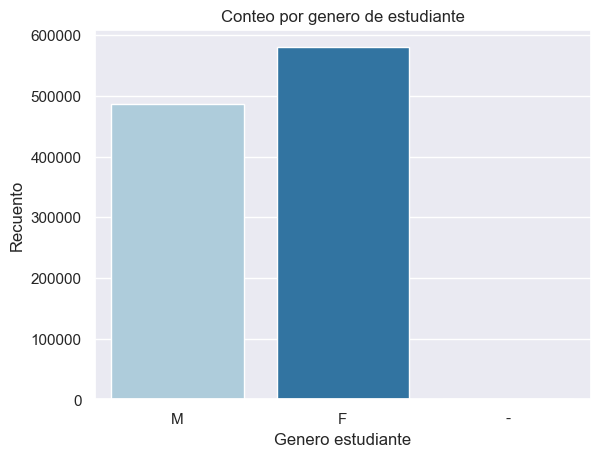

In [45]:
sns.set_palette("Paired")
ax = sns.countplot(x="ESTU_GENERO", data=df_copy)
ax.set(title='Conteo por genero de estudiante')
ax.set(xlabel="Genero estudiante", ylabel="Recuento")
plt.show()

There are more female students than male students. That's interesting because in other projects when I'm in; I usually saw more male students.

**First:** More women than men.

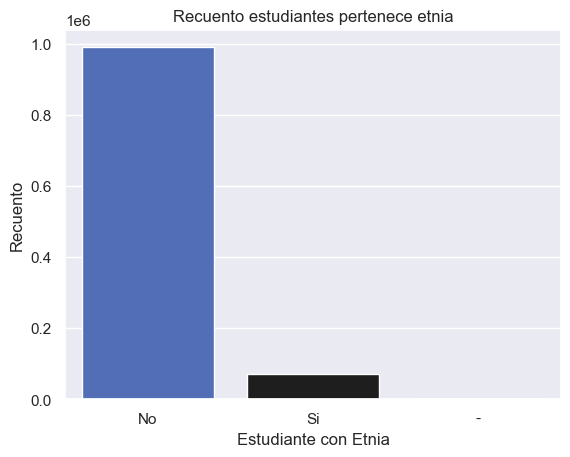

In [46]:
sns.set_palette("Paired")
ax = sns.countplot(x="ESTU_TIENEETNIA", data=df_copy, palette = "icefire")
ax.set(title='Recuento estudiantes pertenece etnia')
ax.set(xlabel="Estudiante con Etnia", ylabel="Recuento")
plt.show()

Students with specific condition aren't representative.

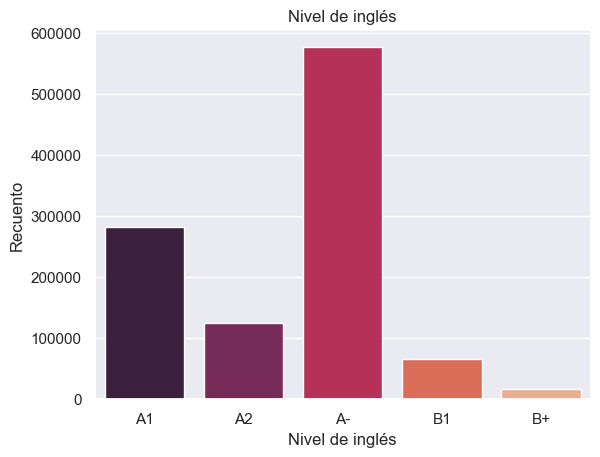

In [47]:
sns.set_palette("Paired")
ax = sns.countplot(x="DESEMP_INGLES", data=df_copy, palette = "rocket")
ax.set(title='Nivel de inglés')
ax.set(xlabel="Nivel de inglés", ylabel="Recuento")
plt.show()

A- is the most english language level in the dataset.

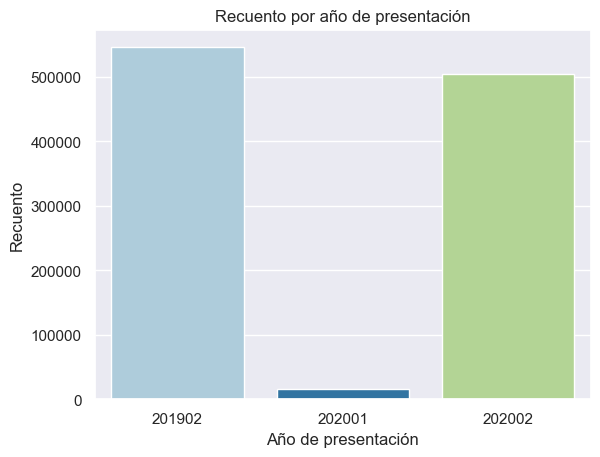

In [48]:
sns.set_palette("Paired")
ax = sns.countplot(x="ANIO_PR", data=df_copy)
ax.set(title='Recuento por año de presentación')
ax.set(xlabel="Año de presentación", ylabel="Recuento")
plt.show()

Well, a COVID-19 reduce the number of students in the 2020-01 period of the ICFES test.

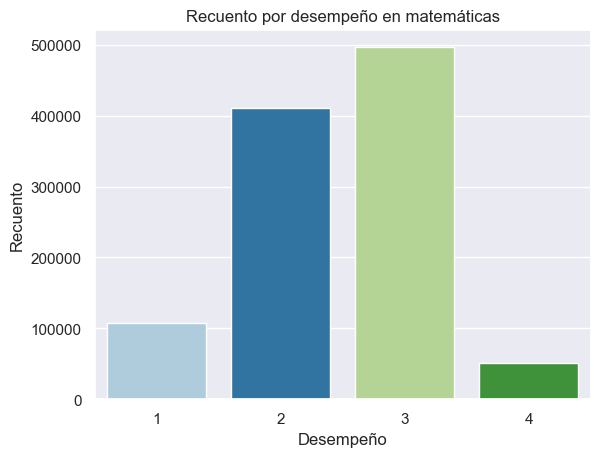

In [49]:
sns.set_palette("Paired")
ax = sns.countplot(x="DESEMP_MATEMATICAS", data=df_copy)
ax.set(title='Recuento por desempeño en matemáticas')
ax.set(xlabel="Desempeño", ylabel="Recuento")
plt.show()

2 and 3 scale are the most commont in the matematics skill.

In [ ]:
ax = sns.boxplot(x = "PUNT_GLOBAL", data = df_copy)
ax.set(title='Diagrama de caja del puntaje global')
ax.set(xlabel="Puntaje global", ylabel="Recuento")
plt.show()

We've a lo tof outliers; but, we could calculate a mean global test result.

### 3.1 Multivariate

Now, we'll explore more than one feature.

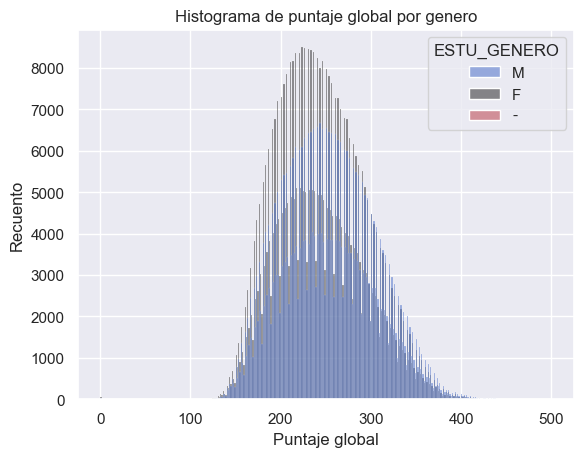

In [51]:
ax = sns.histplot(x = "PUNT_GLOBAL", hue = "ESTU_GENERO", data = df_copy, palette = "icefire")
ax.set(title='Histograma de puntaje global por genero')
ax.set(xlabel="Puntaje global", ylabel="Recuento")
plt.show()

Female students are in the mean of the test results but, more male students has a high test result.

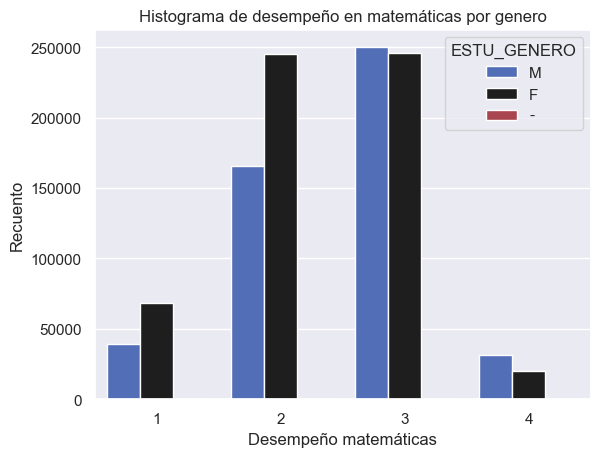

In [52]:
ax = sns.countplot(x = "DESEMP_MATEMATICAS", hue = "ESTU_GENERO", data = df_copy, palette = "icefire")
ax.set(title='Histograma de desempeño en matemáticas por genero')
ax.set(xlabel="Desempeño matemáticas", ylabel="Recuento")
plt.show()

This is a interesting behaviour...

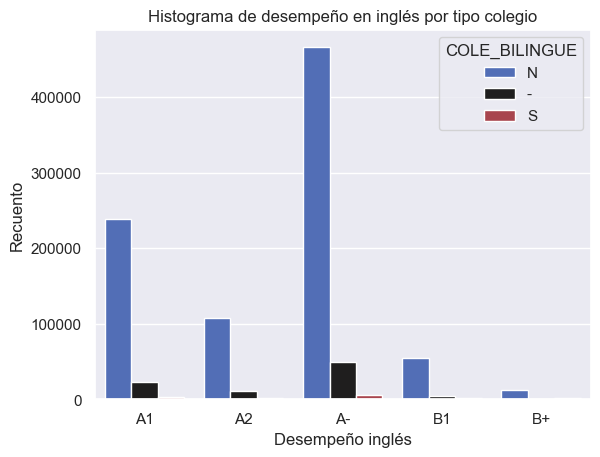

In [53]:
ax = sns.countplot(x = "DESEMP_INGLES", hue = "COLE_BILINGUE", data = df_copy, palette = "icefire")
ax.set(title='Histograma de desempeño en inglés por tipo colegio')
ax.set(xlabel="Desempeño inglés", ylabel="Recuento")
plt.show()

Bilingual schools fall into a low level of English..

In [ ]:
df.corr()

## 4. Predict

We can predict the global test results? Well, we'd tried

Fill na values (please, dont discuss this :c)

In [55]:
df = df.fillna(0)

We'll try to fit a model with.... ALL FEATURES!!!!!!

In [56]:
# Atributos a utilizar
X = df[['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO',
       'ESTU_FECHANACIMIENTO', 'PERIODO', 'ESTU_CONSECUTIVO',
       'ESTU_ESTUDIANTE', 'ESTU_TIENEETNIA', 'ESTU_PAIS_RESIDE', 'ESTU_ETNIA',
       'ESTU_DEPTO_RESIDE', 'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE',
       'ESTU_COD_RESIDE_MCPIO', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR',
       'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE',
       'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS',
       'FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS',
       'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE',
       'FAMI_SITUACIONECONOMICA', 'ESTU_DEDICACIONLECTURADIARIA',
       'ESTU_DEDICACIONINTERNET', 'ESTU_HORASSEMANATRABAJA',
       'ESTU_TIPOREMUNERACION', 'COLE_CODIGO_ICFES',
       'COLE_COD_DANE_ESTABLECIMIENTO', 'COLE_NOMBRE_ESTABLECIMIENTO',
       'COLE_GENERO', 'COLE_NATURALEZA', 'COLE_CALENDARIO', 'COLE_BILINGUE',
       'COLE_CARACTER', 'COLE_COD_DANE_SEDE', 'COLE_NOMBRE_SEDE',
       'COLE_SEDE_PRINCIPAL', 'COLE_AREA_UBICACION', 'COLE_JORNADA',
       'COLE_COD_MCPIO_UBICACION', 'COLE_MCPIO_UBICACION',
       'COLE_COD_DEPTO_UBICACION', 'COLE_DEPTO_UBICACION',
       'ESTU_PRIVADO_LIBERTAD', 'ESTU_ESTADOINVESTIGACION',
       'ESTU_GENERACION-E']]
# Variable a predecir
y = df['PUNT_GLOBAL']

a basic train/test split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### 3.1 A basic model: Linear regressor

Lest go for the most simple modelo: Linear

In [58]:
m_linr_1 = LinearRegression()
m_linr_1.fit(X_train, y_train)
y_pred = m_linr_1.predict(X_test)

In [59]:
mse = mean_squared_error(y_test, y_pred)
print("El error MSE es: ", mse)

El error MSE es:  1710.5803759297555


In [60]:
rmse = np.sqrt(mse)
print("El error RMSE es: ", rmse)

El error RMSE es:  41.3591631434892


A +/- 45 points of RMSE :D

In [61]:
# Opción 1: usando el método score del modelo
r2_1 = m_linr_1.score(X_test, y_test)

# Opción 2: usando la función r2_score
r2_2 = r2_score(y_test, y_pred)

In [62]:
print("Ajuste R2: ", r2_1)

Ajuste R2:  0.33252871715292487


A poort R2 :c

### 3.2 Decision Tree Regressor

Ok, let's go for a decission tree.

In [63]:
# Crea una instancia del modelo
model = DecisionTreeRegressor()

# Entrena el modelo con tus datos de entrenamiento
model.fit(X_train, y_train)

# Usa el modelo para hacer predicciones con tus datos de prueba
y_pred = model.predict(X_test)

# Calcula el MSE
mse = mean_squared_error(y_test, y_pred)
print("Arbol regresor MSE: ", mse)

# Calcula el RMSE
rmse = np.sqrt(mse)
print("Arbol regresor RMSE: ", rmse)

# Calcula el R^2
r2 = r2_score(y_test, y_pred)
print("Arbol regresor R2: ", r2)

Arbol regresor MSE:  2965.7173902663785
Arbol regresor RMSE:  54.45840054818337
Arbol regresor R2:  -0.157227815130897


Ok, we could find a best deep?..... maybe

In [64]:
arbol_prof = [2,4,6,8,10,15,20,25,30,40,50,60,80,90,100,150,200]
#to find the best R2
a_lot_of_r2 = []
for i in arbol_prof:
    model = DecisionTreeRegressor(max_depth=i)
    model.fit(X_train, y_train)
    r2 = r2_score(y_test, y_pred)
    a_lot_of_r2.append(r2)

In [65]:
the_max = max(a_lot_of_r2)
the_max

-0.157227815130897

ok, I guess not...

### 3.3 KNN

A KNN model, why not? 

In [66]:
# Crea una instancia del modelo con 3 vecinos
model = KNeighborsRegressor(n_neighbors=2)

# Entrena el modelo con tus datos de entrenamiento
model.fit(X_train, y_train)

# Usa el modelo para hacer predicciones con tus datos de prueba
y_pred = model.predict(X_test)

In [67]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'R2: {r2}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

R2: 0.054570176573294216
MSE: 2422.926265642776
RMSE: 49.223228923372915


Well, it's not the best.

### 3.3 Random forest

I start think that the problem are the features?

In [68]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [69]:
mse = mean_squared_error(y_test, y_pred)
print("MSE: {:.2f}".format(mse))

MSE: 1422.87


In [70]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE: {:.2f}".format(mse))
print("R2: {:.2f}".format(r2))

MSE: 1422.87
R2: 0.44


Ok, this is fine.

### 3.4 XGBoost

For these regression problems, xgboost is the best option...

In [71]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [72]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE: {:.2f}".format(mse))
print("R2: {:.2f}".format(r2))

MSE: 1351.87
R2: 0.47


Lets go!

In [73]:
df_xg = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

#### 3.4.1 Would you rather think about it?

In [58]:
# Atributos a utilizar
X = df[['ESTU_GENERO', 'ESTU_CONSECUTIVO',
        'ESTU_TIENEETNIA',
       'ESTU_DEPTO_RESIDE', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR',
       'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE',
       'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS',
       'FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS',
       'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE',
       'FAMI_SITUACIONECONOMICA', 'ESTU_DEDICACIONLECTURADIARIA',
       'ESTU_DEDICACIONINTERNET', 'ESTU_HORASSEMANATRABAJA',
       'ESTU_TIPOREMUNERACION', 'COLE_BILINGUE', 'COLE_JORNADA',
       'ESTU_PRIVADO_LIBERTAD', 'ESTU_ESTADOINVESTIGACION',
       'ESTU_GENERACION-E']]
# Variable a predecir
y = df['PUNT_GLOBAL']

a basic train/test split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Lets try...

In [60]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [61]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE: {:.2f}".format(mse))
print("R2: {:.2f}".format(r2))

MSE: 1416.75
R2: 0.44


0.45 is the high R2 result I can get :(

In [71]:
xgb = XGBRegressor(n_estimators=60, learning_rate=0.2, random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE: {:.2f}".format(mse))
print("R2: {:.2f}".format(r2))

MSE: 1411.63
R2: 0.45


## 5. Export data to a external DB

Set up the connection and cursor:

In [ ]:
conn = utils.bd_conn()

In [ ]:
engine = utils.bd_engine()

Check the bd:

In [ ]:
cur = utils.bd_cursor(conn)

*Load to bd:*

In [ ]:
df.to_sql('df_encoding', engine, if_exists='replace')

In [ ]:
df_copy.to_sql('df_copy', engine, if_exists='replace')

In [ ]:
df_xg.to_sql('df_xg', engine, if_exists='replace')

## 6. Basic QR with PowerBI

Well, I'll publish my powerBI app.

This is ht elink: https://app.powerbi.com/groups/me/reports/3161e6b3-72b9-4e6a-b8e0-a67f709fe9a5?pbi_source=desktop

In [57]:
a_link = "https://app.powerbi.com/groups/me/reports/3161e6b3-72b9-4e6a-b8e0-a67f709fe9a5?pbi_source=desktop"

In [58]:
#!pip install qrcode

In [60]:
import qrcode

class Qrgenerator():
  
  link = ""

  def generarqr(self,url):
    qr = qrcode.QRCode(version=1, box_size= 10, border= 5)
    self.link = url
    qr.add_data(self.link)
    qr.make(fit = True)
    imagen = qr.make_image(fill_color="black",back_color = "white")
    imagen.save("qr_powerbi_projecticfes.png")


obj = Qrgenerator()
#link = input("Digite la url a convertir en código QR: ")
link = a_link
obj.generarqr(link)

## 7. Findings

- We need to improve english skills in college.
- Students have to use internet connection for productive tasks.
- In fact, how to teach matematics need to change.
- Some cities don't have a really fast internet connection.
- We'll can precit test results using some students features.

## 8. Takeways

### 7.1 What we didn't do?

- Normal test for select the best features.
- Correlations analytics.
- Improve model parameters.
- Another way to fill na.
- Outliers analytics.

### 7.2 What did we do better?

- Python init file.
- Functions definition in separate files.
- DB connection.

### 7.3 What will we do better next time?

- Improve model selection.
- A SH script for python project execution.
- An analytics for each period of ICFES test presentation.

### 7.4 What would I liked to do?

- Improve model validation.
- A cross validation/random search.